In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

C:\Users\sou09\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\sou09\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
C:\Users\sou09\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
df_train=pd.read_excel('Data_Train.xlsx')
df_test=pd.read_excel('Test_set.xlsx')

df= pd.concat([df_train,df_test], axis=0)

In [3]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0
...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN


In [4]:
# Null values

df.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
dtype: int64

In [5]:
# Dropping null values 
df.dropna(inplace=True)
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [6]:
df.shape

(10682, 11)

In [7]:
df['Source'].value_counts()


Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

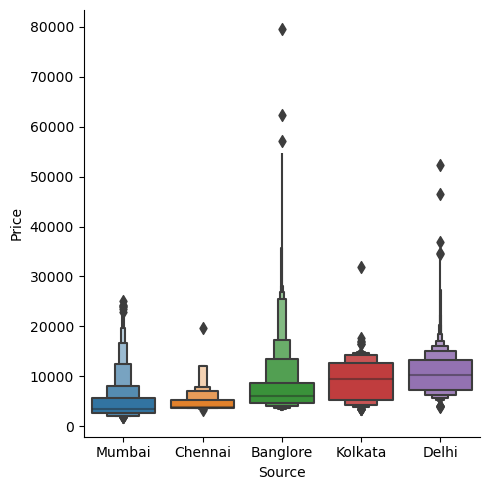

In [8]:
sns.catplot(x='Source',y='Price',data=df.sort_values('Price'),kind="boxen")
plt.show()

     Source         Price
0  Banglore   8017.464269
1   Chennai   4789.892388
2     Delhi  10540.113536
3   Kolkata   9158.389411
4    Mumbai   5059.708752


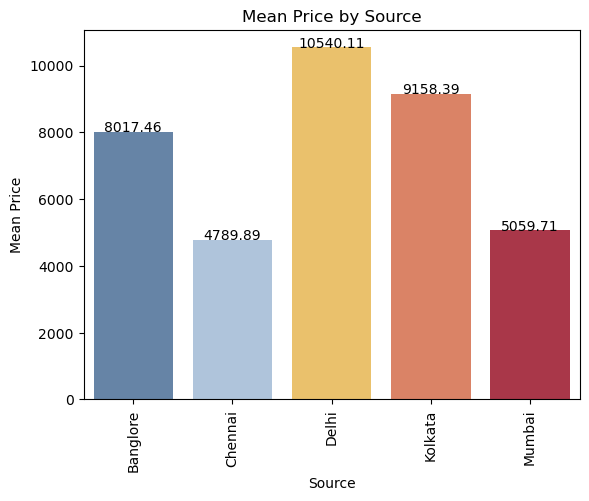

In [9]:
# Checking average price for source 

mean_prices=df.groupby('Source')['Price'].mean().reset_index()

print(mean_prices)
my_colors = ["#5B84B1", "#A8C4E2", "#FFC857", "#ED7953", "#BC243C"]

ax=sns.barplot(x='Source',y='Price',data=mean_prices,palette=my_colors)

for index, row in mean_prices.iterrows():
    ax.text(row.name, row.Price, round(row.Price,2), color='black',ha='center')


ax.set_xlabel('Source')
ax.set_ylabel('Mean Price')
plt.xticks(rotation=90)
ax.set_title('Mean Price by Source')
plt.show()

In [10]:
# Prices variation based on Airline

df.groupby('Airline')['Price'].mean().reset_index()

,Airline,Price
0,Air Asia,5590.260188
1,Air India,9612.427756
2,GoAir,5861.056701
3,IndiGo,5673.682903
4,Jet Airways,11643.923357
5,Jet Airways Business,58358.666667
6,Multiple carriers,10902.678094
7,Multiple carriers Premium economy,11418.846154
8,SpiceJet,4338.284841
9,Trujet,4140.000000


Text(0.5, 1.0, 'Mean Price by Airlines')

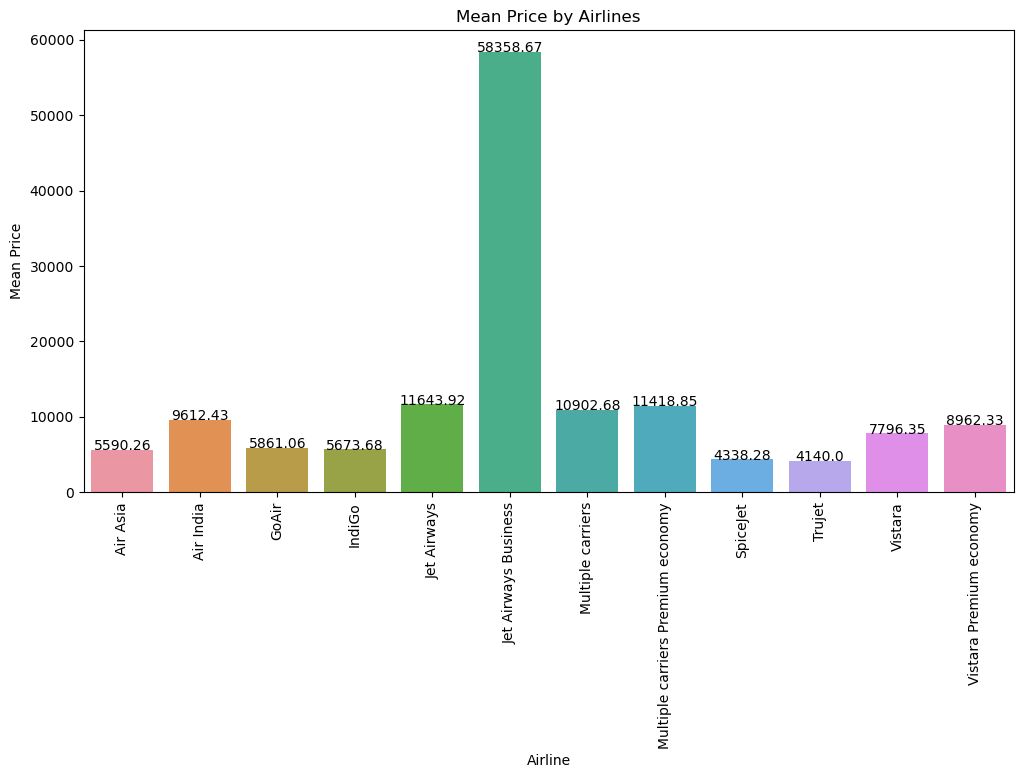

In [11]:
mean_prices=df.groupby('Airline')['Price'].mean().reset_index()

plt.figure(figsize=(12,6))
ax=sns.barplot(x='Airline',y='Price',data=mean_prices)

for index, row in mean_prices.iterrows():
    ax.text(row.name, row.Price, round(row.Price,2), color='black',ha='center')
    
plt.xticks(rotation=90)
ax.set_xlabel('Airline')
ax.set_ylabel('Mean Price')
ax.set_title('Mean Price by Airlines')

**Feature Engineering**

In [12]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107.0
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145.0
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229.0
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648.0


In [13]:
df['Day']=pd.to_datetime(df['Date_of_Journey']).dt.day
df['Month']=pd.to_datetime(df['Date_of_Journey']).dt.month
df['Year']=pd.to_datetime(df['Date_of_Journey']).dt.year
df['Departure_hour']=pd.to_datetime(df['Dep_Time']).dt.hour
df['Departure_Minute']=pd.to_datetime(df['Dep_Time']).dt.minute

In [14]:
df.drop('Date_of_Journey',axis=1,inplace=True)
df.drop('Route',axis=1,inplace=True)
df.drop('Dep_Time',axis=1,inplace=True)
df

,Airline,Source,Destination,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Departure_hour,Departure_Minute
0,IndiGo,Banglore,New Delhi,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019,22,20
1,Air India,Kolkata,Banglore,13:15,7h 25m,2 stops,No info,7662.0,5,1,2019,5,50
2,Jet Airways,Delhi,Cochin,04:25 10 Jun,19h,2 stops,No info,13882.0,6,9,2019,9,25
3,IndiGo,Kolkata,Banglore,23:30,5h 25m,1 stop,No info,6218.0,5,12,2019,18,5
4,IndiGo,Banglore,New Delhi,21:35,4h 45m,1 stop,No info,13302.0,3,1,2019,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,22:25,2h 30m,non-stop,No info,4107.0,4,9,2019,19,55
10679,Air India,Kolkata,Banglore,23:20,2h 35m,non-stop,No info,4145.0,27,4,2019,20,45
10680,Jet Airways,Banglore,Delhi,11:20,3h,non-stop,No info,7229.0,27,4,2019,8,20
10681,Vistara,Banglore,New Delhi,14:10,2h 40m,non-stop,No info,12648.0,3,1,2019,11,30


In [15]:
# Break down the arrival time
# take after 6 as nyt
# take between 5-10 as morning
# 10-6 as afternoon
# Saturday and sunday as weekend

In [16]:
df.drop('Arrival_Time',axis=1,inplace=True)
df

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Departure_hour,Departure_Minute
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,No info,3897.0,24,3,2019,22,20
1,Air India,Kolkata,Banglore,7h 25m,2 stops,No info,7662.0,5,1,2019,5,50
2,Jet Airways,Delhi,Cochin,19h,2 stops,No info,13882.0,6,9,2019,9,25
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,No info,6218.0,5,12,2019,18,5
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,No info,13302.0,3,1,2019,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,2h 30m,non-stop,No info,4107.0,4,9,2019,19,55
10679,Air India,Kolkata,Banglore,2h 35m,non-stop,No info,4145.0,27,4,2019,20,45
10680,Jet Airways,Banglore,Delhi,3h,non-stop,No info,7229.0,27,4,2019,8,20
10681,Vistara,Banglore,New Delhi,2h 40m,non-stop,No info,12648.0,3,1,2019,11,30


In [17]:
# Effect of total stops on the price

stops_mean=df.groupby('Total_Stops')['Price'].mean().reset_index()
stops_mean

,Total_Stops,Price
0,1 stop,10594.123556
1,2 stops,12715.807895
2,3 stops,13112.000000
3,4 stops,17686.000000
4,non-stop,5024.900315


Text(0.5, 1.0, 'Mean Price by Stops')

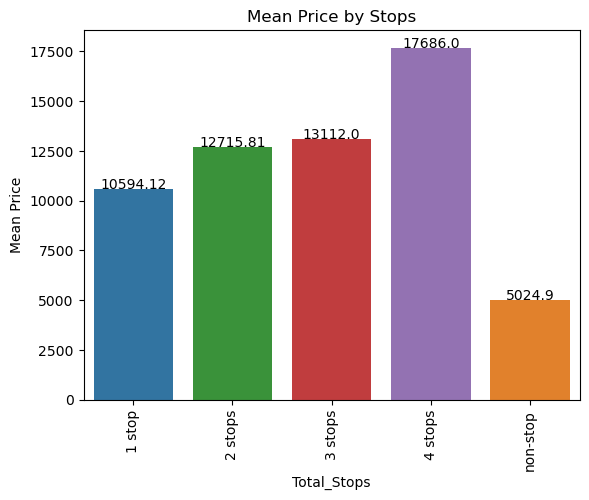

In [18]:
Stops_mean=df.groupby('Total_Stops')['Price'].mean().reset_index()

colors = ["#1f77b4", "#2ca02c", "#d62728", "#9467bd", "#ff7f0e"]
ax=sns.barplot(x='Total_Stops',y='Price',data=Stops_mean,palette=colors)
for index, row in Stops_mean.iterrows():
    ax.text(row.name, row.Price, round(row.Price,2), color='black',ha='center')
    

plt.xticks(rotation=90)
ax.set_xlabel('Total_Stops')
ax.set_ylabel('Mean Price')
ax.set_title('Mean Price by Stops')

In [19]:
# dividing data in Morning Afternoon Evening Night

# Morning 6-11:59
# Afternoon 12-17:59
# Evening 18-23:59
# Night 00:00-5:59

df

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Departure_hour,Departure_Minute
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,No info,3897.0,24,3,2019,22,20
1,Air India,Kolkata,Banglore,7h 25m,2 stops,No info,7662.0,5,1,2019,5,50
2,Jet Airways,Delhi,Cochin,19h,2 stops,No info,13882.0,6,9,2019,9,25
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,No info,6218.0,5,12,2019,18,5
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,No info,13302.0,3,1,2019,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,2h 30m,non-stop,No info,4107.0,4,9,2019,19,55
10679,Air India,Kolkata,Banglore,2h 35m,non-stop,No info,4145.0,27,4,2019,20,45
10680,Jet Airways,Banglore,Delhi,3h,non-stop,No info,7229.0,27,4,2019,8,20
10681,Vistara,Banglore,New Delhi,2h 40m,non-stop,No info,12648.0,3,1,2019,11,30


In [20]:
def get_time_of_day(hour):
    if hour < 6:
        return 'Night'
    elif hour < 12:
        return 'Morning'
    elif hour < 18:
        return 'Afternoon'
    elif hour < 24:
        return 'Evening'
    else:
        return 'Unknown'


df['time_of_day'] = df.apply(lambda a: get_time_of_day(a['Departure_hour']), axis=1)
df

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Departure_hour,Departure_Minute,time_of_day
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,No info,3897.0,24,3,2019,22,20,Evening
1,Air India,Kolkata,Banglore,7h 25m,2 stops,No info,7662.0,5,1,2019,5,50,Night
2,Jet Airways,Delhi,Cochin,19h,2 stops,No info,13882.0,6,9,2019,9,25,Morning
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,No info,6218.0,5,12,2019,18,5,Evening
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,No info,13302.0,3,1,2019,16,50,Afternoon
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,2h 30m,non-stop,No info,4107.0,4,9,2019,19,55,Evening
10679,Air India,Kolkata,Banglore,2h 35m,non-stop,No info,4145.0,27,4,2019,20,45,Evening
10680,Jet Airways,Banglore,Delhi,3h,non-stop,No info,7229.0,27,4,2019,8,20,Morning
10681,Vistara,Banglore,New Delhi,2h 40m,non-stop,No info,12648.0,3,1,2019,11,30,Morning


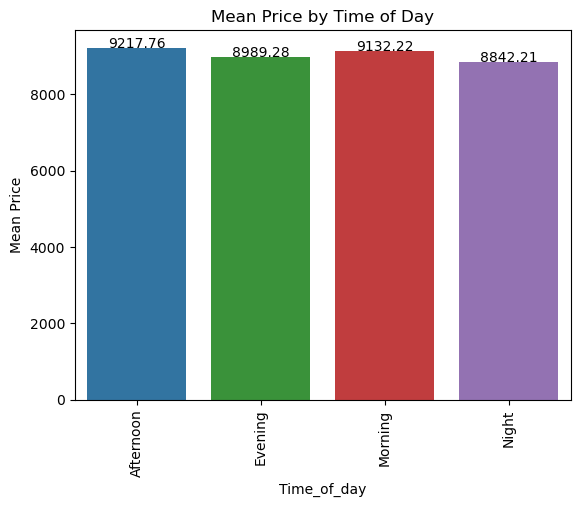

In [21]:
# Checking price wrt to time_of_day

time_of_day=df.groupby('time_of_day')['Price'].mean().reset_index()

colors = ["#1f77b4", "#2ca02c", "#d62728", "#9467bd"]
ax=sns.barplot(x='time_of_day',y='Price',data=time_of_day,palette=colors)

for index, row in time_of_day.iterrows():
    ax.text(row.name, row.Price, round(row.Price,2), color='black',ha='center')
    

plt.xticks(rotation=90)
ax.set_xlabel('Time_of_day')
ax.set_ylabel('Mean Price')
ax.set_title('Mean Price by Time of Day');


In [22]:
# Determining the Day of the week
df['date']=pd.to_datetime(df[['Day','Month','Year']])

df['day_of_week'] = df['date'].dt.day_name()

df.drop('date',axis=1,inplace=True)
df


,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Departure_hour,Departure_Minute,time_of_day,day_of_week
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,No info,3897.0,24,3,2019,22,20,Evening,Sunday
1,Air India,Kolkata,Banglore,7h 25m,2 stops,No info,7662.0,5,1,2019,5,50,Night,Saturday
2,Jet Airways,Delhi,Cochin,19h,2 stops,No info,13882.0,6,9,2019,9,25,Morning,Friday
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,No info,6218.0,5,12,2019,18,5,Evening,Thursday
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,No info,13302.0,3,1,2019,16,50,Afternoon,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,2h 30m,non-stop,No info,4107.0,4,9,2019,19,55,Evening,Wednesday
10679,Air India,Kolkata,Banglore,2h 35m,non-stop,No info,4145.0,27,4,2019,20,45,Evening,Saturday
10680,Jet Airways,Banglore,Delhi,3h,non-stop,No info,7229.0,27,4,2019,8,20,Morning,Saturday
10681,Vistara,Banglore,New Delhi,2h 40m,non-stop,No info,12648.0,3,1,2019,11,30,Morning,Thursday


  day_of_week        Price
0      Friday  8556.502220
1      Monday  9721.101945
2    Saturday  8894.375727
3      Sunday  9556.827684
4    Thursday  9805.088646
5     Tuesday  8960.452265
6   Wednesday  7996.613892


Text(0.5, 1.0, 'Mean Price by Days of Week')

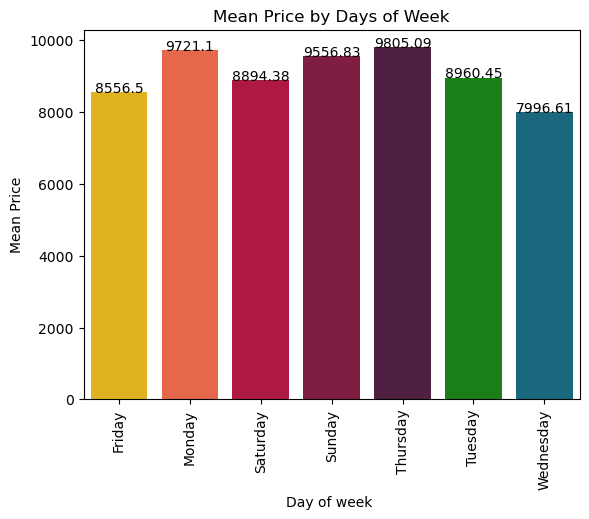

In [23]:
day=df.groupby('day_of_week')['Price'].mean().reset_index()

print(day)

colors = ["#FFC300", "#FF5733", "#C70039", "#900C3F", "#581845", "#0A8F08", "#08718F"]

ax=sns.barplot(x='day_of_week',y='Price',data=day,palette=colors)

for index, row in day.iterrows():
    ax.text(row.name, row.Price, round(row.Price,2), color='black',ha='center')
    
plt.xticks(rotation=90)
ax.set_xlabel('Day of week ')
ax.set_ylabel('Mean Price')
ax.set_title('Mean Price by Days of Week')


In [24]:
from pivottablejs import pivot_ui

pivot_ui(df)

In [25]:
df.drop(['Duration','Additional_Info'],axis=1,inplace=True)

In [26]:
df

,Airline,Source,Destination,Total_Stops,Price,Day,Month,Year,Departure_hour,Departure_Minute,time_of_day,day_of_week
0,IndiGo,Banglore,New Delhi,non-stop,3897.0,24,3,2019,22,20,Evening,Sunday
1,Air India,Kolkata,Banglore,2 stops,7662.0,5,1,2019,5,50,Night,Saturday
2,Jet Airways,Delhi,Cochin,2 stops,13882.0,6,9,2019,9,25,Morning,Friday
3,IndiGo,Kolkata,Banglore,1 stop,6218.0,5,12,2019,18,5,Evening,Thursday
4,IndiGo,Banglore,New Delhi,1 stop,13302.0,3,1,2019,16,50,Afternoon,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,non-stop,4107.0,4,9,2019,19,55,Evening,Wednesday
10679,Air India,Kolkata,Banglore,non-stop,4145.0,27,4,2019,20,45,Evening,Saturday
10680,Jet Airways,Banglore,Delhi,non-stop,7229.0,27,4,2019,8,20,Morning,Saturday
10681,Vistara,Banglore,New Delhi,non-stop,12648.0,3,1,2019,11,30,Morning,Thursday


<Axes: >

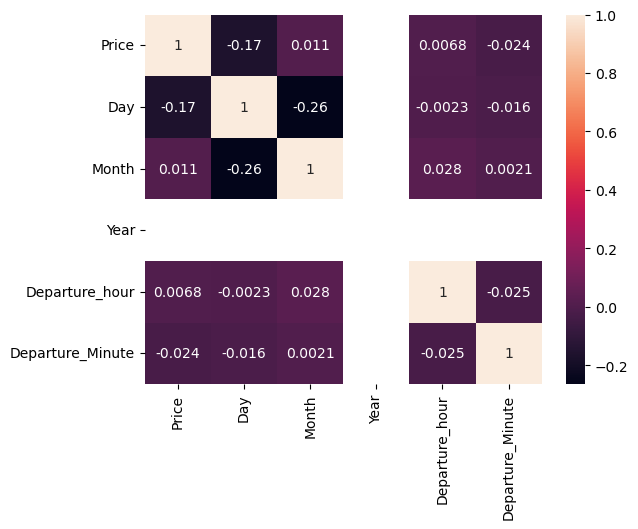

In [27]:
sns.heatmap(df.corr(),annot=True,fmt='.2g')

In [28]:
df=pd.get_dummies(df,drop_first=True)


In [29]:
df

,Price,Day,Month,Year,Departure_hour,Departure_Minute,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,...,Total_Stops_non-stop,time_of_day_Evening,time_of_day_Morning,time_of_day_Night,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
0,3897.0,24,3,2019,22,20,0,0,1,0,...,1,1,0,0,0,0,1,0,0,0
1,7662.0,5,1,2019,5,50,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0
2,13882.0,6,9,2019,9,25,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
3,6218.0,5,12,2019,18,5,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
4,13302.0,3,1,2019,16,50,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,4107.0,4,9,2019,19,55,0,0,0,0,...,1,1,0,0,0,0,0,0,0,1
10679,4145.0,27,4,2019,20,45,1,0,0,0,...,1,1,0,0,0,1,0,0,0,0
10680,7229.0,27,4,2019,8,20,0,0,0,1,...,1,0,1,0,0,1,0,0,0,0
10681,12648.0,3,1,2019,11,30,0,0,0,0,...,1,0,1,0,0,0,0,1,0,0


In [30]:
# Building model
# Random Forest is Used

In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [32]:
X=df.iloc[:,1:]
Y=df.iloc[:,0]

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=12)

In [33]:
regressor= RandomForestRegressor()
regressor.fit(X_train, y_train)

RandomForestRegressor()

In [34]:
from sklearn.metrics import r2_score
y_pred = regressor.predict(X_test)

# compute the accuracy score
r2 = r2_score(y_test, y_pred)
print(f'R_2 score is {r2*100:1.3f}')

R_2 score is 78.618


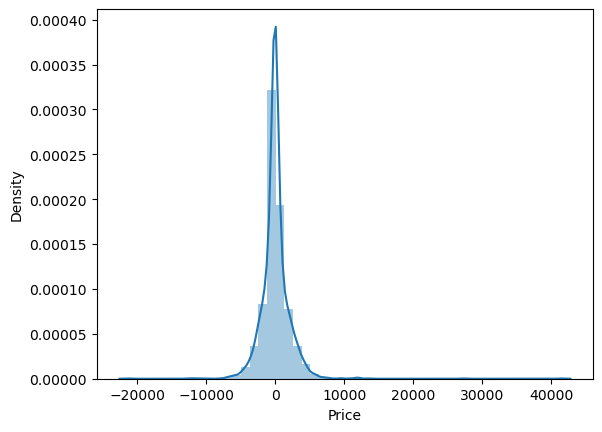

In [35]:
# Checking out the feature importance

sns.distplot(y_test-y_pred)
plt.show()

In [36]:
from sklearn.ensemble import ExtraTreesRegressor
importance = ExtraTreesRegressor()
importance.fit(X, Y)

ExtraTreesRegressor()

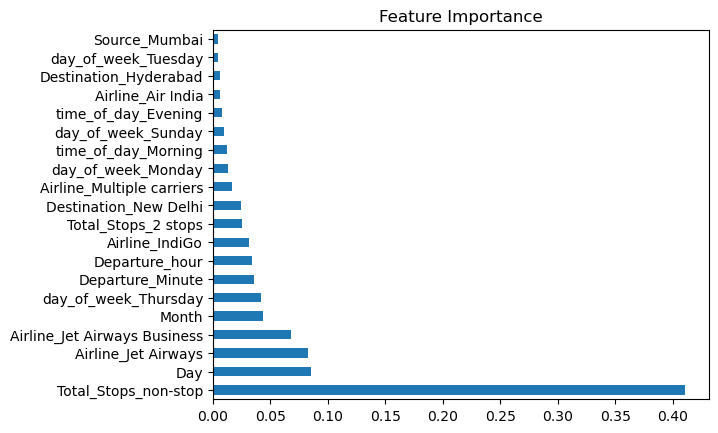

In [37]:
feature_importances = pd.Series(importance.feature_importances_, index=X.columns)
feature_importances.nlargest(20).plot(kind='barh')
plt.title('Feature Importance')
plt.show()

# Converting into Pickel file

In [38]:
import pickle


In [39]:
pickle.dump(regressor,open('farepredictor.pkl','wb'))

In [40]:
pickled_model=pickle.load(open('farepredictor.pkl','rb'))